<a href="https://colab.research.google.com/github/silmarildust/SIP-2024/blob/main/figures/fig4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/silmarildust/SIP-2024/raw/main/figures/data/dataplussf.xlsx

--2024-07-19 06:29:17--  https://github.com/silmarildust/SIP-2024/raw/main/figures/data/dataplussf.xlsx
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/silmarildust/SIP-2024/main/figures/data/dataplussf.xlsx [following]
--2024-07-19 06:29:17--  https://raw.githubusercontent.com/silmarildust/SIP-2024/main/figures/data/dataplussf.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248716 (243K) [application/octet-stream]
Saving to: ‘dataplussf.xlsx’

dataplussf.xlsx     100%[===================>] 242.89K  --.-KB/s    in 0.04s   

2024-07-19 06:29:18 (6.18 MB/s) - ‘dataplussf.xlsx’ saved [248716/2

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.stats import kruskal

In [3]:
df = pd.read_excel("dataplussf.xlsx", skiprows=13)

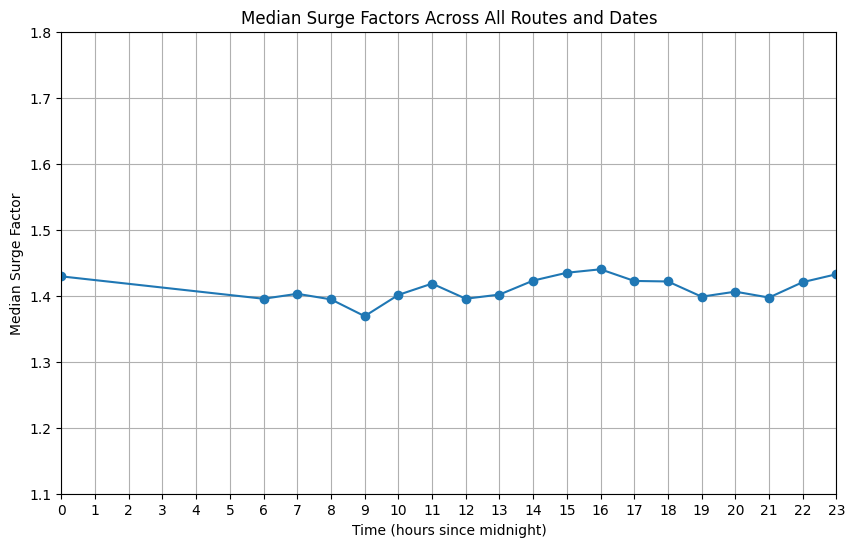

In [4]:
df = pd.read_excel("dataplussf.xlsx", skiprows=13)

df['date'] = pd.to_datetime(df['date'].astype(str), format='%Y%m%d')
df['app_booking hour'].astype(str).apply(lambda x: x.split(':')[0]).astype(int)

df['app_booking hour_hours'] = df['app_booking hour'].apply(lambda t: np.round(t.hour + t.minute / 60 + t.second / 3600, 0))

median_surge_factors = df.groupby('app_booking hour_hours')['Surge factor'].median()

plt.figure(figsize=(10, 6))
plt.plot(median_surge_factors.index, median_surge_factors.values, marker='o', linestyle='-')
plt.xlabel('Time (hours since midnight)')
plt.ylabel('Median Surge Factor')
plt.title('Median Surge Factors Across All Routes and Dates')
plt.grid(True)
plt.ylim(1.1, 1.8)
plt.xlim(0, 23)
plt.xticks(np.arange(0, 24, 1))

plt.show()



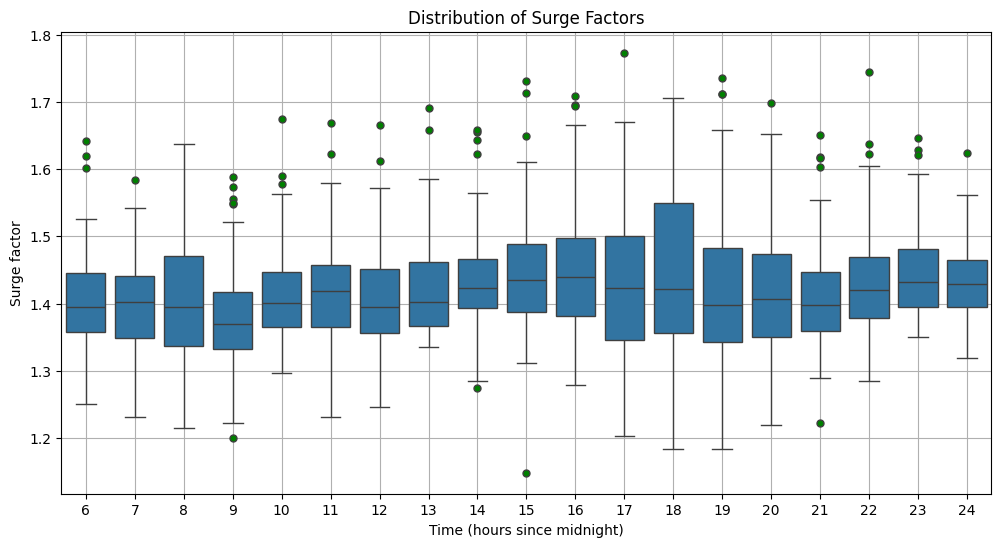

In [51]:
def f(x):
  if x == 0:
    x = 24
  return x

df['app_booking hour_hours'] = df['app_booking hour_hours'].apply(f)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Time (hours since midnight)')
ax.set_ylabel('Surge factor')
ax.set_title('Distribution of Surge Factors')
ax.set_xticks(np.arange(0, 19, 1), labels = [str(i+6) for i in range(0,19)])

sns.boxplot(x='app_booking hour_hours', y='Surge factor', data=df, flierprops={'marker':'o', 'markerfacecolor':'green', 'markersize':5}, ax=ax)
plt.grid(True)
# plt.ylim(1.1, 1.8)
# plt.xticks(np.arange(0, 24, 1), label = [str(i) for i in range(6,25)])
plt.show()



In [10]:
grouped_data = df.groupby('app_booking hour_hours')['Surge factor'].apply(list)

f_statistic, p_value = stats.f_oneway(*grouped_data)

print(f"F-statistic: {f_statistic:.10f}")
print(f"P-value: {p_value:.10f}")

F-statistic: 3.0984889725
P-value: 0.0000130393


In [11]:
statistic, p_value = kruskal(*grouped_data)

print(f"Kruskal-Wallis H-statistic: {statistic:.10f}")
print(f"P-value: {p_value:.10f}")

Kruskal-Wallis H-statistic: 56.0257078647
P-value: 0.0000088295
